In [7]:
import torch
import cv2
from torch.autograd import Variable
from torchvision import transforms
from matplotlib.image import imsave
#from toonnx import to_onnx
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from  models import *

In [8]:
use_cuda = False
model = Unet(3,4)
# model.load_state_dict(torch.load('output/params_10.pth'))
model.load_state_dict(torch.load('107best.pth'))

model.eval()
if use_cuda and torch.cuda.is_available():
    model.cuda()
train_transforms = transforms.Compose([

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])
width = 500
height = 500
root=r'data'
file = os.listdir(root)

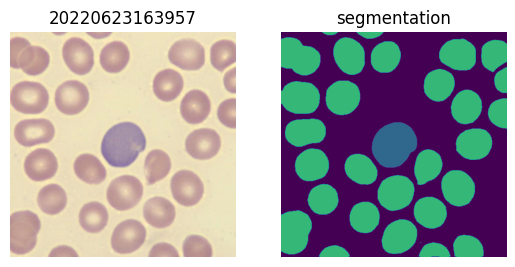

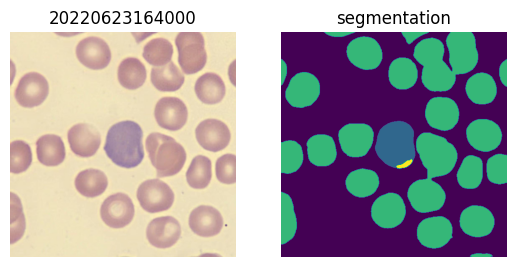

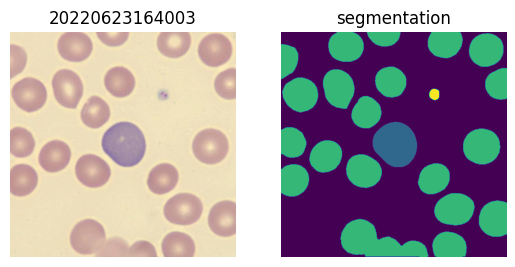

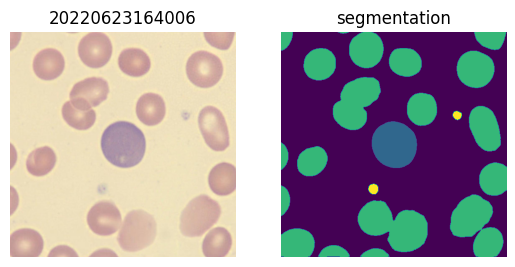

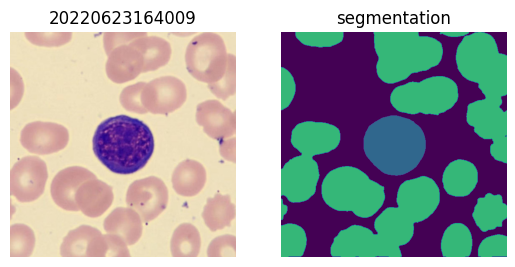

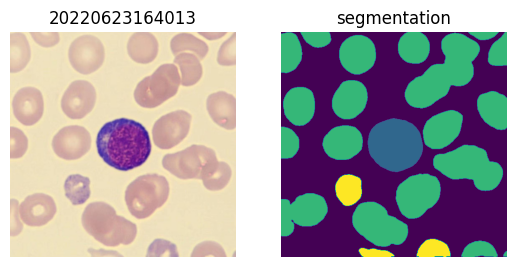

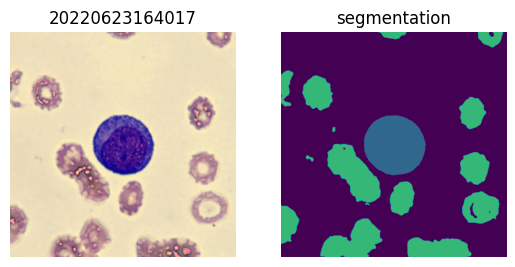

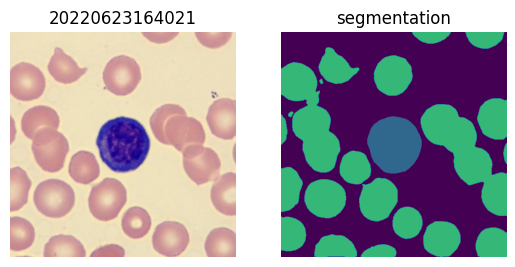

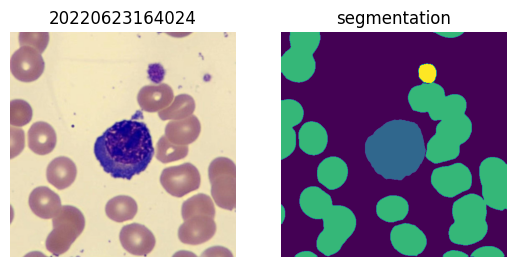

In [9]:
imgs=[]
for line in file:
    img = Image.open((os.path.join(root, line,'img.png')))
    mask=Image.open((os.path.join(root, line, 'label.png')))
    img = img.resize((width, height))
    mask = mask.resize((width, height))
    # img_tensor = transforms.ToTensor()(img)
    img_tensor = train_transforms(img)
    img_tensor = img_tensor.unsqueeze(0)

    if use_cuda and torch.cuda.is_available():
        prediction = model(Variable(img_tensor.cuda()))
    else:
        prediction = model(Variable(img_tensor))
    prediction = prediction.squeeze(3).squeeze(2)
    pred = torch.max(prediction, 1)[1]

    result=np.array(pred).reshape(width,height)
    np.save('result//'+line,result)
    
    result[0,0]=3 #为了让他看以来一样

    
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.title(line)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title('segmentation')
    plt.imshow(result)
    plt.show()
